In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy.ndimage.filters import gaussian_filter


import math
import numpy as np
from ipywidgets import Dropdown

def plot_data_3d(file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    df = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY', 'PosZ'])
    df = df[~((df['PosX'] == 0) & (df['PosY'] == 0) & (df['PosZ'] == 10))]
    regions = df['Region'].unique()
    for region in regions:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        region_df = df[df['Region'] == region]
        colors = ['black' if pd.isna(target) else 'red' for target in region_df['Target']]
        ax.scatter(region_df['PosX'], region_df['PosY'], region_df['PosZ'], c=colors)
        plt.title(f'Region {region}')
        plt.show()

C:\Users\Haaris\AppData\Local\Temp\ipykernel_19440\4278175379.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
def plot_data_2d(file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    df = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY'])
    df = df[~((df['PosX'] == 0) & (df['PosY'] == 0) & (df['PosX'] == 10))]
    regions = df['Region'].unique()
    for region in regions:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        region_df = df[df['Region'] == region]
        colors = ['black' if pd.isna(target) else 'red' for target in region_df['Target']]
        ax.scatter(region_df['PosX'], region_df['PosY'], c=colors)
        plt.title(f'Region {region}')
        plt.show()

In [3]:
def plot_data_2d_v2(file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    df = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY'])
    df = df[~((df['PosX'] == 0) & (df['PosY'] == 0) & (df['PosX'] == 10))]
    regions = df['Region'].unique()
    for region in regions:
        fig = plt.figure(figsize=(40, 40))
        ax = fig.add_subplot(111)
        region_df = df[df['Region'] == region]
        colors = ['black' if pd.isna(target) else 'red' for target in region_df['Target']]
        ax.scatter(region_df['PosX'], region_df['PosY'], c=colors)
        plt.title(f'Region {region}')
        plt.show()

In [4]:
# Select CSV file
folder_path = 'data'
files = [filename for filename in os.listdir("..\eyetracking\Assets\Scripts\Data") if filename.endswith('.csv')]

dropdown = Dropdown(options=files)
display(dropdown)

Dropdown(options=('GazeData1.csv', 'GazeData2.csv'), value='GazeData1.csv')

In [6]:
# Run this cell after selecting a file from the dropdown menu
plot_data_2d(dropdown.value)
#plot_data_3d(dropdown.value)
plot_data_2d_v2(dropdown.value)

ValueError: Usecols do not match columns, columns expected but not found: ['Timestamp']

In [ ]:
def heatmap_data(file, image_file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    df = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY'])
    df = df[~((df['PosX'] == 0) & (df['PosY'] == 0))]
    img = plt.imread(image_file)
    regions = df['Region'].unique()
    for region in regions:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.imshow(img)
        ax.set_facecolor('none')
        fig.patch.set_alpha(1.0)
        region_df = df[df['Region'] == region]
        heatmap_data = region_df[['PosX', 'PosY']].copy()
        
        # Scale the data in the PosX and PosY columns to match the resolution of the background image
        heatmap_data.loc[:, 'PosX'] = heatmap_data['PosX'] / heatmap_data['PosX'].max() * img.shape[1]
        heatmap_data.loc[:, 'PosY'] = heatmap_data['PosY'] / heatmap_data['PosY'].max() * img.shape[0]
        
        sns.kdeplot(data=heatmap_data, x='PosX', y='PosY', fill=True)
        plt.title(f'Region {region}')
        plt.show()

In [ ]:
heatmap_data(dropdown.value, '..\eyetracking\Assets\Scripts\Data\Screenshots\Screenshot_GazeData(3)_Region(0).png')

In [120]:
def load_data(file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    data = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY'])
    data = data[~((data['PosX'] == 0) & (data['PosY'] == 0))]

    #data['PosX'] = data['PosX'] * 1920
    #data['PosY'] = data['PosY'] * 1080
    
    return data
    
    


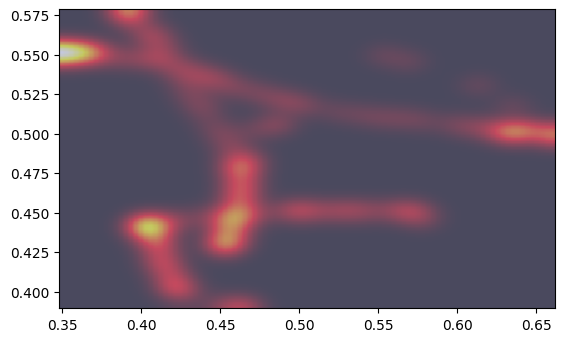

In [121]:
heatmap_data = load_data(dropdown.value)
heatmap = heatmap / np.max(heatmap)
heatmap, xedges, yedges = np.histogram2d(heatmap_data['PosX'], heatmap_data['PosY'], bins=(100, 100))
heatmap = gaussian_filter(heatmap, sigma=3)

background = Image.open('..\eyetracking\Assets\Scripts\Data\Screenshots\Screenshot_GazeData(3)_Region(0).png')
plt.imshow(background, alpha=0.5)
plt.imshow(heatmap, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='hot', alpha=0.5)
plt.show()




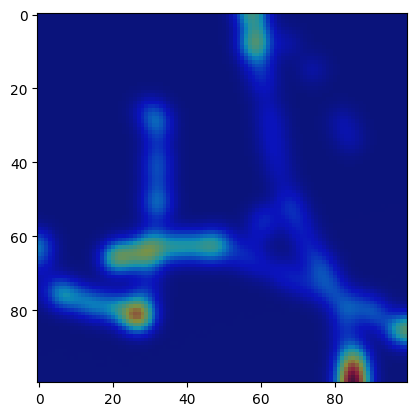

In [94]:

# Load the screenshot
screenshot = Image.open('..\eyetracking\Assets\Scripts\Data\Screenshots\Screenshot_GazeData(3)_Region(0).png')

   # Resize the screenshot to match your resolution if necessary
screenshot = screenshot.resize((width, height))

screenshot = np.array(screenshot)
   # Create the plot
fig, ax = plt.subplots()

   # Display the screenshot
ax.imshow(screenshot)

   # Display the heatmap (use the 'jet' colormap for a classic heatmap look)
ax.imshow(np.rot90(heatmap), cmap='jet', alpha=0.5)

plt.show()

     Timestamp  Region      Target         PosX        PosY
0     3.007613       1  Cube(High)  1176.116160  554.603652
1     3.232906       1         NaN  1165.344576  563.988852
2     3.284464       1         NaN  1116.517824  593.155332
3     3.315087       1         NaN  1071.901440  607.242420
4     3.338841       1         NaN  1015.399104  623.881440
..         ...     ...         ...          ...         ...
157  16.676810       3         NaN   866.670912  560.329920
158  16.707170       3         NaN   864.969792  563.930100
159  16.753160       3         NaN   862.072320  567.030564
160  16.785180       3         NaN   856.080576  567.897912
161  16.813940       3         NaN   848.575296  571.014900

[162 rows x 5 columns]


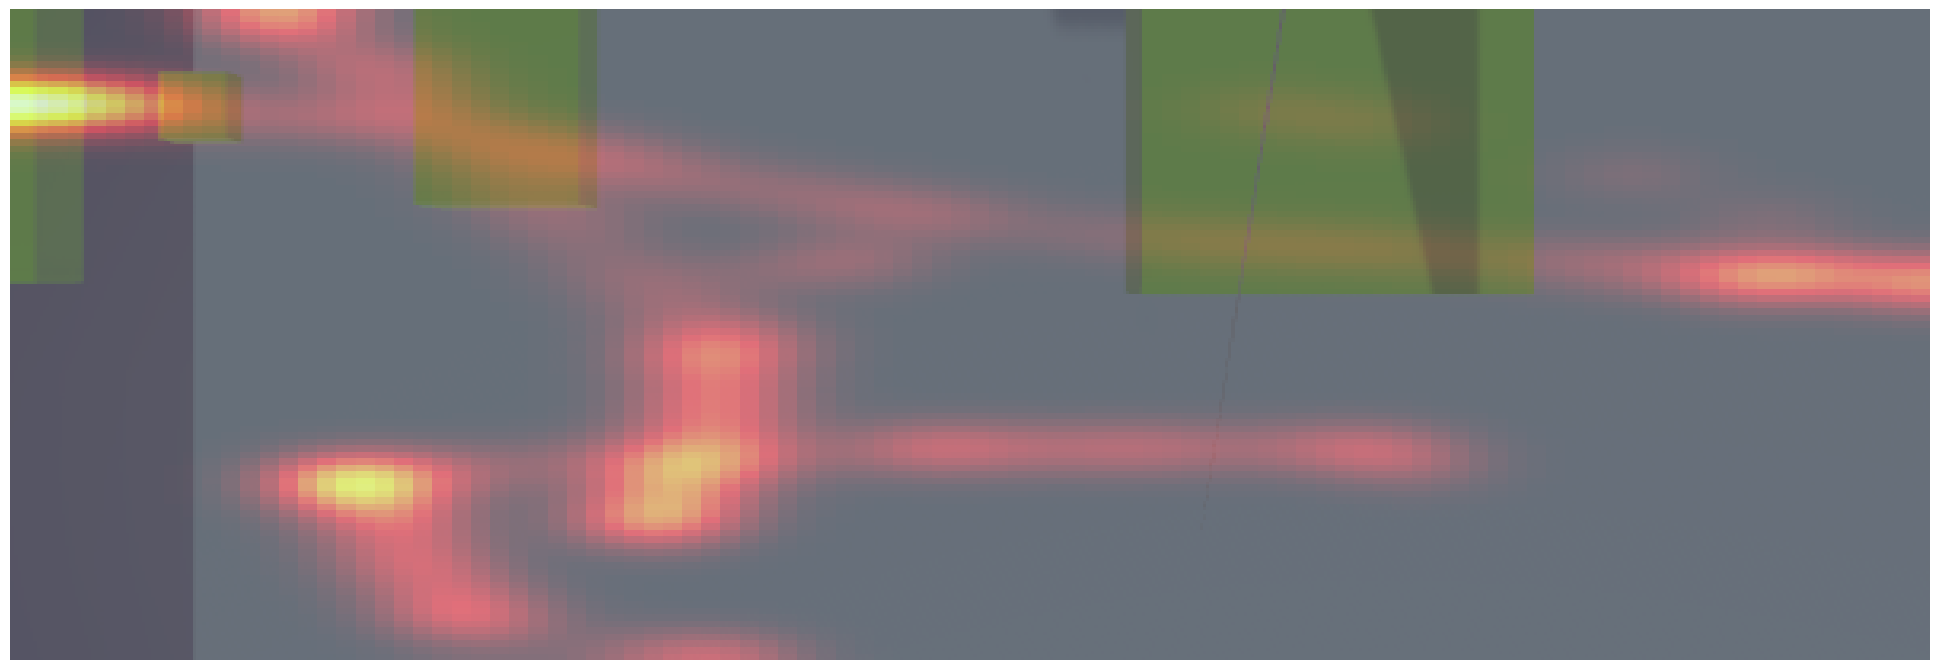

In [99]:
# Load the data
data = load_data(dropdown.value)

print(data)
# Create a 2D histogram of the gaze points
heatmap, xedges, yedges = np.histogram2d(data['PosX'], data['PosY'], bins=(100, 100))

# Apply a Gaussian blur to the histogram to smooth it out
heatmap = gaussian_filter(heatmap, sigma=3)

# Open the background image
background = Image.open('..\eyetracking\Assets\Scripts\Data\Screenshots\Screenshot_GazeData(3)_Region(0).png')

# Create a new figure with the same aspect ratio as the image
fig = plt.figure(figsize=(19.2, 10.8), dpi=100)

fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the heatmap
plt.imshow(background, alpha=0.5)
plt.imshow(heatmap, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='hot', alpha=0.5)

# Remove axes for a cleaner look
plt.axis('off')

# Show the plot
plt.show()


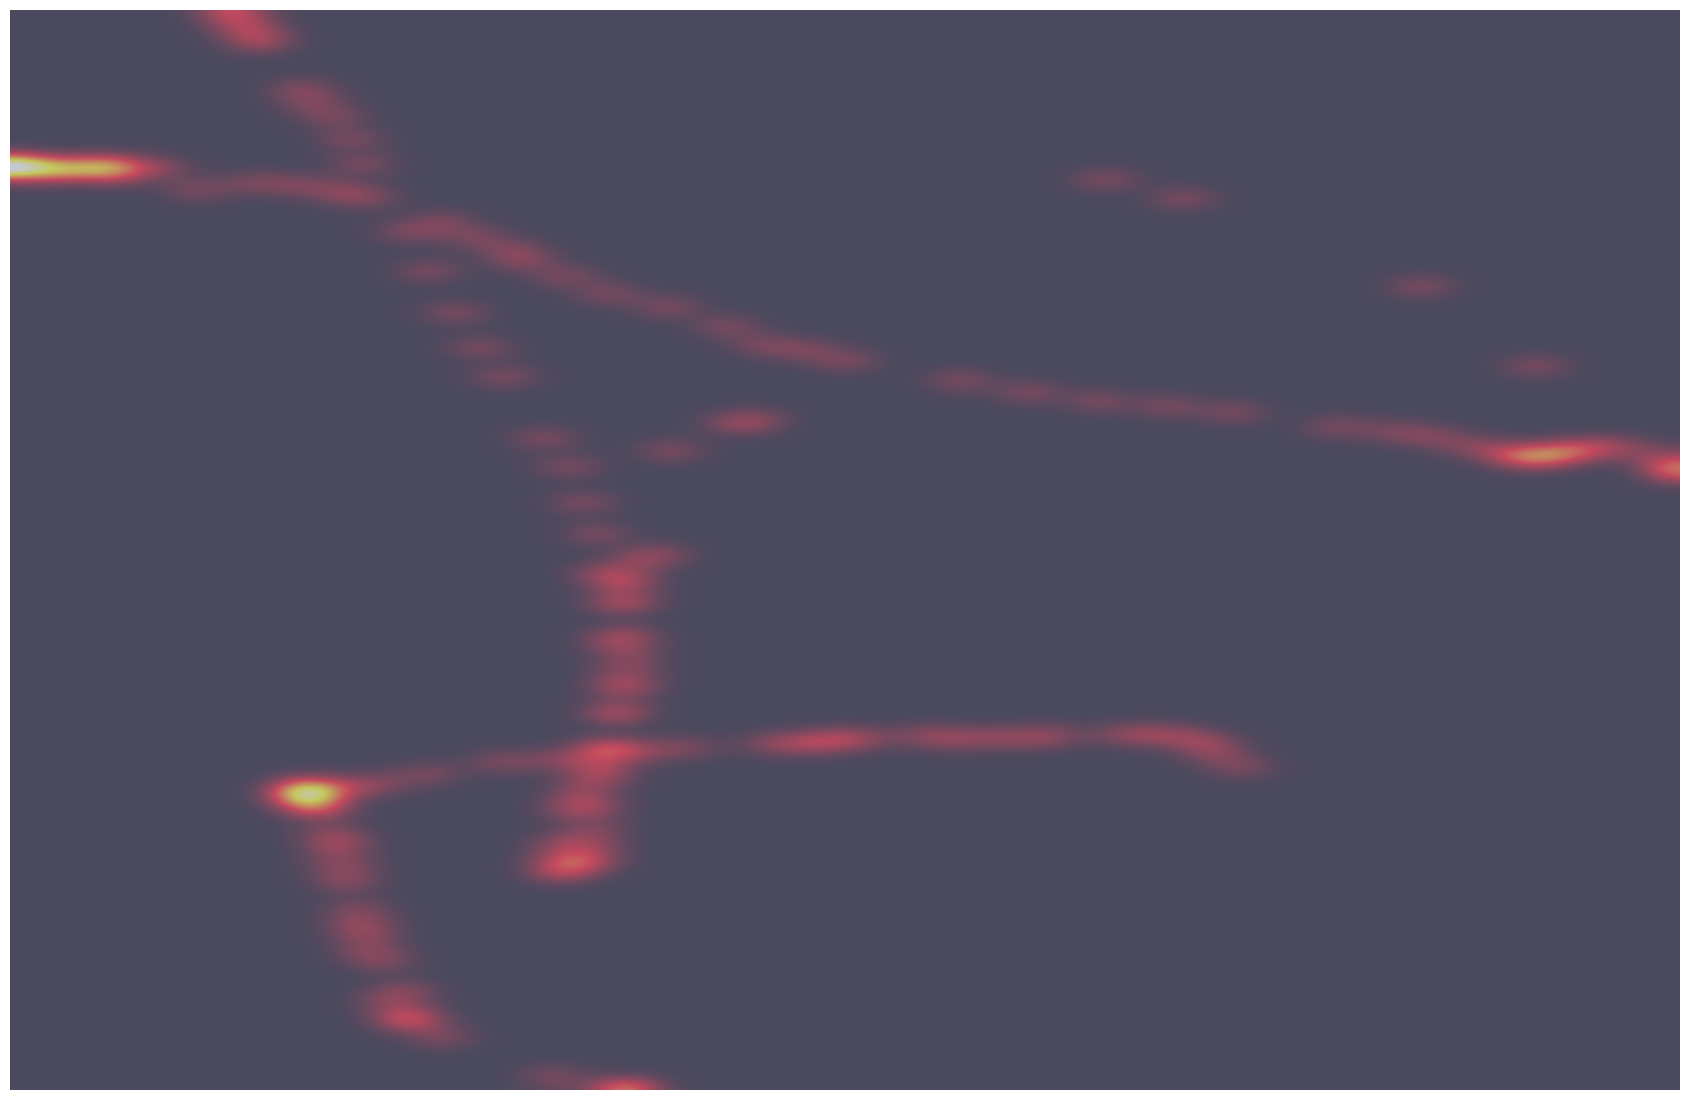

In [119]:
# Load the data
data = load_data(dropdown.value)

# Old resolution
old_res = np.array([3664, 1920])

# New resolution
new_res = np.array([1920, 1080])

# Scale factor for each dimension
scale = new_res / old_res

# Rescale the gaze data
data['PosX'] = data['PosX'] * scale[0]
data['PosY'] = data['PosY'] * scale[1]

# Create a 2D histogram of the gaze points
heatmap, xedges, yedges = np.histogram2d(data['PosX'], data['PosY'], bins=(1920, 1080))

# Apply a Gaussian blur to the histogram to smooth it out
heatmap = gaussian_filter(heatmap, sigma=16)

# Open the background image
background = Image.open('..\eyetracking\Assets\Scripts\Data\Screenshots\Screenshot_GazeData(3)_Region(0).png')

# Calculate the aspect ratio of the image
aspect_ratio = 1920 / 1080

# Create a new figure with the same aspect ratio as the image
fig = plt.figure(figsize=(19.2, 10.8), dpi=100)

# Create a new axes with the same aspect ratio as the image
ax = fig.add_axes([0, 0, 1, 1], aspect=aspect_ratio)

# Remove the space around the plot
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the heatmap
ax.imshow(background, alpha=0.5)
ax.imshow(heatmap, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='hot', alpha=0.5)

# Remove axes for a cleaner look
ax.axis('off')

# Save the figure with the desired size and DPI
plt.savefig('heatmap.png', dpi=96, bbox_inches='tight', pad_inches=0)